# From random scatter to grid

Convert a 3-dimensional random scatter plot to a 3-dimensional grid to extract contours and region contours

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from matplotlib.colors import LogNorm
import pandas as pd

In the data fule we choose three random variables that have values spaning several orders of magnitude. We call 
* `x,y,z` the random variables
* `xi,yi,zi` the grid variables
We start by ploting the random variables with `plt.hexbix` to illustrate the desired plot:

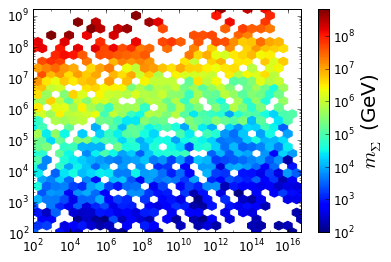

In [8]:
yd=pd.read_csv('data/unification_two_45.csv')
x=yd.m_Phi
y=yd.m_Lambda
z=yd.m_Sigma
plt.hexbin(x,y,z,xscale='log',yscale='log',norm=LogNorm(),gridsize=30)
c=plt.colorbar()
c.set_label(r'$m_\Sigma$ (GeV)',size=20)
plt.xticks([1E2,1E4,1E6,1E8,1E10,1E12,1E14,1E16])
matplotlib.rcParams.update({'font.size': 12})
#matplotlib.rcParams.update({'xtick.major.pad': 20.0})
#plt.xscale('linear')
#plt.
#plt.grid()

To use `plt.contour` and `plt.contourf` we need to conver the random data into an uniform grid. The trick is accomplished by the use of  `mlab.griddata(x,y,z,xi,yi, interp='linear')`

However, before the interpolation we need to smoothing the data:

In [4]:
xlog=np.log10(yd.m_Phi)
ylog=np.log10(yd.m_Lambda)
zlog=np.log10(yd.m_Sigma)

Final result

In [5]:
ngrid = 100
xi_log = np.linspace(xlog.min(),xlog.max(),ngrid)
yi_log = np.linspace(ylog.min(),ylog.max(),ngrid)

In [9]:
zi_log = mlab.griddata(xlog,ylog,zlog,xi_log,yi_log, interp='linear')

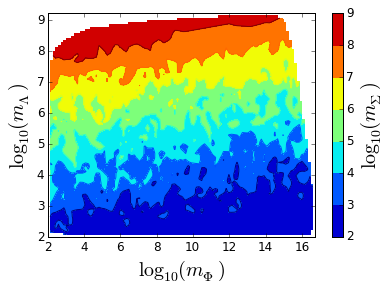

In [10]:
plt.contour(xi_log,yi_log,zi_log)
plt.contourf(xi_log,yi_log,zi_log)
plt.xlabel(r'$\log_{10}(m_\Phi)$',size=20)
plt.ylabel(r'$\log_{10}(m_\Lambda)$',size=20)
c=plt.colorbar()
c.set_label('$\log_{10}(m_\Sigma)$',size=20)